In [5]:
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## MECA653: Traitement de donnée - Analyse de la base de donnée de la sécurité routière

L'objectif ici est d'analyser les données fournies par le ministère de l'intérieure sur les accidents de la route resencés en 2016.

Le Module Panda sera largement utilisé.

##  Sources
Lien vers data.gouv.fr :
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/#_

Documentation de la base de donnée : 
DATA/Description_des_bases_de_donnees_ONISR_-Annees_2005_a_2016.pdf

## 1 - Charger les bases de donnée 

In [6]:
dfc = pd.read_csv('./DATA/caracteristiques_2016.csv') 
dfu = pd.read_csv('./DATA/usagers_2016.csv')
dfl = pd.read_csv('./DATA/lieux_2016.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
dfc.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590


In [8]:
dfl.tail()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
59427,201600059428,3,3,2.0,NaN,2.0,0.0,0.0,842.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
59428,201600059429,2,2,2.0,NaN,2.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
59429,201600059430,2,1,2.0,NaN,2.0,0.0,1.0,50.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,99.0
59430,201600059431,2,1,2.0,NaN,2.0,0.0,3.0,438.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,99.0
59431,201600059432,2,1,2.0,NaN,2.0,0.0,1.0,157.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0


In [9]:
dfu.tail()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
133417,201600059431,1.0,1,4,1,0.0,21.0,0.0,0.0,0.0,1994.0,A01
133418,201600059431,1.0,1,4,1,0.0,21.0,0.0,0.0,0.0,1990.0,B01
133419,201600059432,1.0,1,4,1,3.0,21.0,0.0,0.0,0.0,1967.0,A01
133420,201600059432,2.0,2,4,1,0.0,21.0,0.0,0.0,0.0,1967.0,A01
133421,201600059432,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1981.0,B01


In [10]:
df = pd.concat([dfu, dfc, dfl], axis=1)
df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,...,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,...,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,...,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


## 2 - Quelle est la poportion Homme/Femme impliquée dans les accidents ? Représenter le résultat sous forme graphique.

In [11]:
# methode pas propre
(h,c)=df[df.sexe==1].shape
(f,c)=df[df.sexe==2].shape

(t,c)=df.shape

print('h/t=', h/t)
print('f/t=', f/t)

h/t= 0.6999145568197149
f/t= 0.3000854431802851


In [12]:
# methode panda
df["sexe"].value_counts(normalize=True)

1    0.699915
2    0.300085
Name: sexe, dtype: float64

<IPython.core.display.Javascript object>


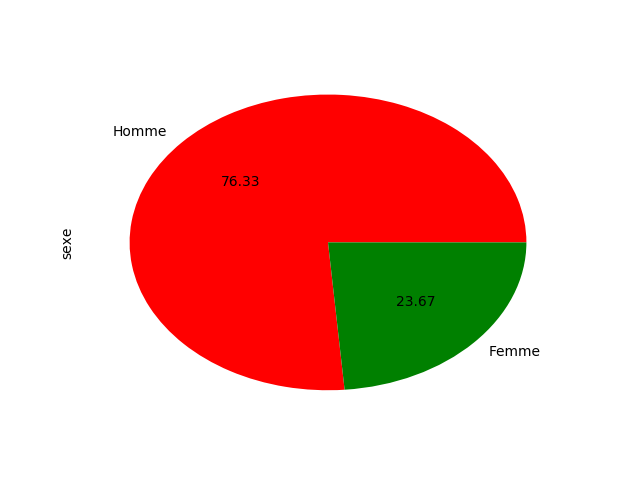

In [13]:
fig = plt.figure()
df[df.grav==2].sexe.value_counts(normalize=True).plot.pie(labels=['Homme', 'Femme'], colors= ['r', 'g'], autopct='%.2f')

## 2 - Quelle est la poportion des accidents ayant eu lieu le jour, la nuit ou a l'aube/crépuscule? Représenter le résultat sous forme graphique.

In [14]:
dlum = df["lum"].value_counts(normalize=True)
dlum = dlum.sort_index()

In [15]:
dlum

1.0    0.682763
2.0    0.060035
3.0    0.085627
4.0    0.008548
5.0    0.163027
Name: lum, dtype: float64

<IPython.core.display.Javascript object>


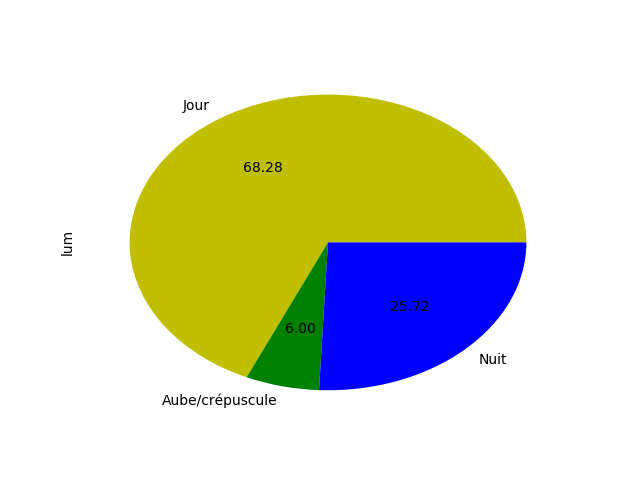

In [16]:
dlum[3] = dlum[3:5].sum()
fig = plt.figure()
dlum[1:3].plot.pie(labels=['Jour','Aube/crépuscule', 'Nuit'], colors= ['y', 'g' , 'b'], autopct='%.2f')

## 3- Repésenter graphiquement la position géographique des accidents ayant eu lieu en metropole


In [17]:
# methode pas a pas
dfp = df[df.gps=='M']
dfp = dfp[['lat','long']]
dfp = dfp[(dfp.long!=0.0) & (dfp.lat!=0.0)]
dfp.head()

,lat,long
21,5084579.0,226407.0
50,5068000.0,279300.0
51,5064100.0,271200.0
55,5070800.0,276500.0
57,5070266.0,262094.0


<IPython.core.display.Javascript object>


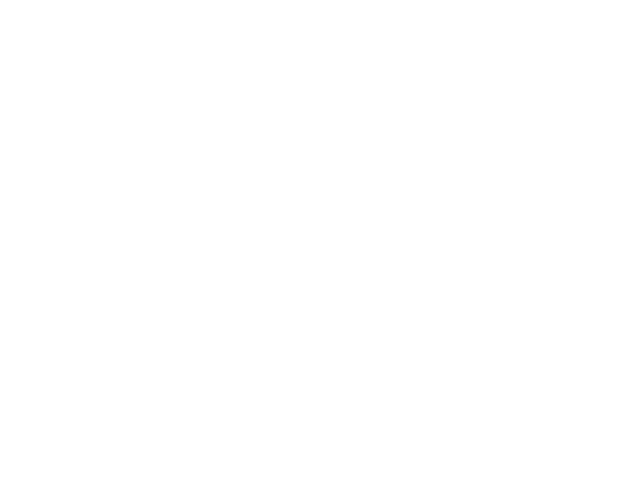

<IPython.core.display.Javascript object>


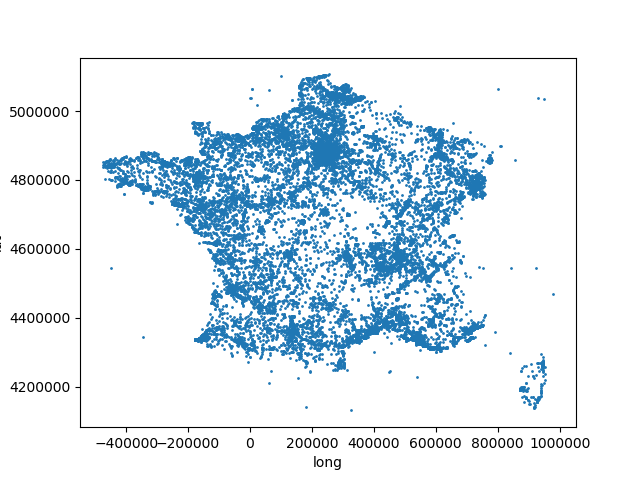

In [18]:
plt.figure()
dfp.plot.scatter(x='long', y='lat',s=1);

In [ ]:
# methode direct
plt.figure()
df[(df.long!=0.0) & (df.lat!=0.0) & (df.gps=='M')].plot.scatter(x='long', y='lat',s=.5)

## 4 - Age des personnes impliquées

In [32]:
df=df.assign(age=2016.-dfu.an_nais)
nb_bin=df.age.max().astype(np.int)

<IPython.core.display.Javascript object>


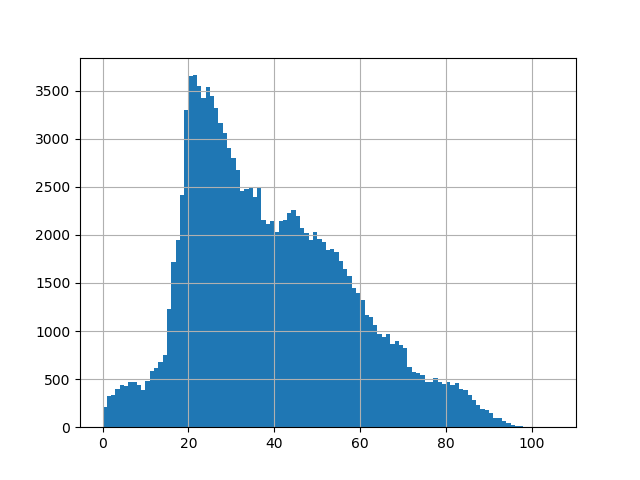

In [34]:
plt.figure()
df['age'].hist(bins=nb_bin)
plt.show()

<IPython.core.display.Javascript object>


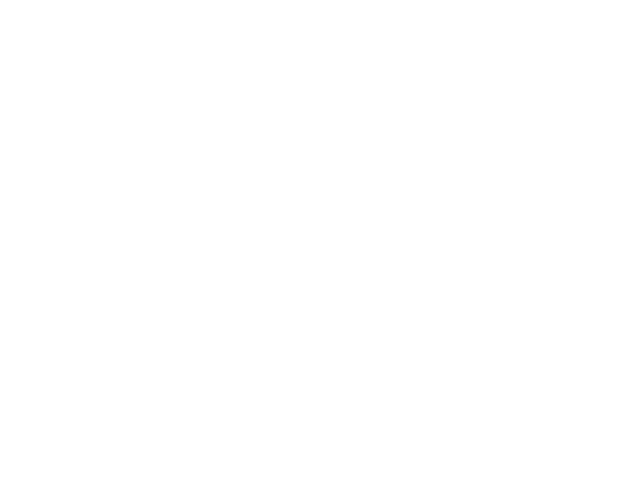

<IPython.core.display.Javascript object>


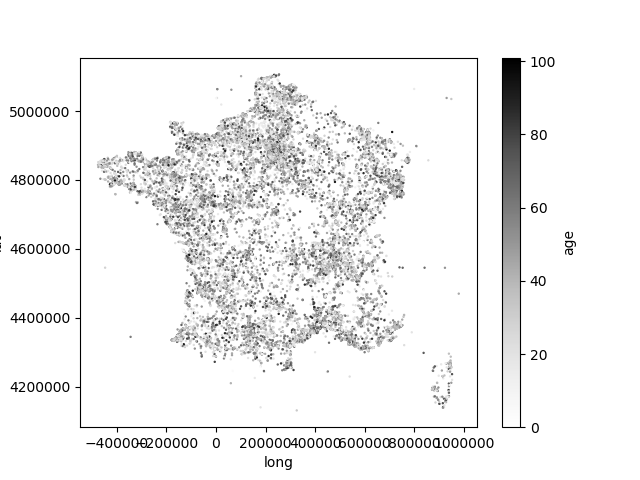

In [35]:
plt.figure()
df[(df.long!=0.0) & (df.lat!=0.0) & (df.gps=='M')].plot.scatter(x='long', y='lat',c='age',s=.5)